## Data Cleaning
-  Import required libraries to clean data
- select only 'us-101' and 'i-80' Locations
- Drop "Movement","Direction", "Section_ID","Int_ID","D_Zone","O_Zone" as all these features contain null values for seected locations
- Drop "Lane_ID" as we do not want the model which would dependent on "Lane_ID"
- filter the features called "Preceding" and "Following" as '0' represents no following vehicle ,'0' represents no preceding vehicle 
- 


Import libraries and data

In [1]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.subplots as sp #visualization
import plotly.figure_factory as ff#visualization
from PIL import  Image
%matplotlib inline
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the NGSIM dataset using pandas
ngsim = pd.read_csv("/content/drive/MyDrive/Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data.csv")

In [4]:
ngsim

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
0,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11,us-101
1,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11,us-101
2,2224,6548,1902,1113437421700,41.429,472.901,6042814.264,2133542.012,14.3,6.9,...,NaN,NaN,NaN,NaN,NaN,2208,2211,53.34,2.01,i-80
3,2127,6459,567,1118847624800,19.632,1775.614,6452425.122,1872172.475,13.5,6.9,...,NaN,NaN,NaN,NaN,NaN,2124,2132,48.92,1.30,us-101
4,1033,4827,592,1118848324700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,...,NaN,NaN,NaN,NaN,NaN,1029,1040,38.81,0.92,us-101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850521,1355,5622,938,1113438127100,18.275,1464.336,6042648.149,2134520.896,12.3,6.8,...,NaN,NaN,NaN,NaN,NaN,1351,1361,26.91,15.92,i-80
11850522,1474,5688,401,1113438133700,5.509,560.412,6042767.840,2133624.549,17.8,7.9,...,NaN,NaN,NaN,NaN,NaN,1468,1480,74.49,1.73,i-80
11850523,398,2368,654,1113437801700,18.903,635.841,6042771.741,2133701.076,15.2,8.5,...,NaN,NaN,NaN,NaN,NaN,385,406,90.95,3.77,i-80
11850524,599,875,577,1113436854400,77.094,621.358,6042831.282,2133693.854,15.3,6.4,...,NaN,NaN,NaN,NaN,NaN,0,611,0.00,0.00,i-80


In [5]:
#ngsim = ngsim.head(1000)

In [6]:
ngsim1 = ngsim[(ngsim["Location"] == "us-101") | (ngsim["Location"] == "i-80")] 

In [7]:
ngsim1

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
0,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11,us-101
1,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11,us-101
2,2224,6548,1902,1113437421700,41.429,472.901,6042814.264,2133542.012,14.3,6.9,...,NaN,NaN,NaN,NaN,NaN,2208,2211,53.34,2.01,i-80
3,2127,6459,567,1118847624800,19.632,1775.614,6452425.122,1872172.475,13.5,6.9,...,NaN,NaN,NaN,NaN,NaN,2124,2132,48.92,1.30,us-101
4,1033,4827,592,1118848324700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,...,NaN,NaN,NaN,NaN,NaN,1029,1040,38.81,0.92,us-101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850521,1355,5622,938,1113438127100,18.275,1464.336,6042648.149,2134520.896,12.3,6.8,...,NaN,NaN,NaN,NaN,NaN,1351,1361,26.91,15.92,i-80
11850522,1474,5688,401,1113438133700,5.509,560.412,6042767.840,2133624.549,17.8,7.9,...,NaN,NaN,NaN,NaN,NaN,1468,1480,74.49,1.73,i-80
11850523,398,2368,654,1113437801700,18.903,635.841,6042771.741,2133701.076,15.2,8.5,...,NaN,NaN,NaN,NaN,NaN,385,406,90.95,3.77,i-80
11850524,599,875,577,1113436854400,77.094,621.358,6042831.282,2133693.854,15.3,6.4,...,NaN,NaN,NaN,NaN,NaN,0,611,0.00,0.00,i-80


In [8]:
ngsim1 = ngsim1.drop(["Movement","Direction", "Section_ID","Int_ID","D_Zone","O_Zone"], axis =1)

In [9]:
ngsim1 = ngsim1.drop(["Lane_ID"], axis = 1)


In [10]:
ngsim1

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,v_Class,v_Vel,v_Acc,Preceding,Following,Space_Headway,Time_Headway,Location
0,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,2,23.31,2.05,500,523,119.10,5.11,us-101
1,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,2,23.31,2.05,500,523,119.10,5.11,us-101
2,2224,6548,1902,1113437421700,41.429,472.901,6042814.264,2133542.012,14.3,6.9,2,26.54,-0.76,2208,2211,53.34,2.01,i-80
3,2127,6459,567,1118847624800,19.632,1775.614,6452425.122,1872172.475,13.5,6.9,2,37.52,11.20,2124,2132,48.92,1.30,us-101
4,1033,4827,592,1118848324700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,2,41.99,0.10,1029,1040,38.81,0.92,us-101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850521,1355,5622,938,1113438127100,18.275,1464.336,6042648.149,2134520.896,12.3,6.8,2,1.69,0.17,1351,1361,26.91,15.92,i-80
11850522,1474,5688,401,1113438133700,5.509,560.412,6042767.840,2133624.549,17.8,7.9,2,42.94,-4.79,1468,1480,74.49,1.73,i-80
11850523,398,2368,654,1113437801700,18.903,635.841,6042771.741,2133701.076,15.2,8.5,2,24.12,-4.21,385,406,90.95,3.77,i-80
11850524,599,875,577,1113436854400,77.094,621.358,6042831.282,2133693.854,15.3,6.4,2,13.00,0.00,0,611,0.00,0.00,i-80


In [11]:
#'0' represents no following vehicle ,'0' represents no preceding vehicle 
ngsim1[(ngsim1['Preceding'] > 0) & (ngsim1['Following'] > 0)]

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,v_Class,v_Vel,v_Acc,Preceding,Following,Space_Headway,Time_Headway,Location
0,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,2,23.31,2.05,500,523,119.10,5.11,us-101
1,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,2,23.31,2.05,500,523,119.10,5.11,us-101
2,2224,6548,1902,1113437421700,41.429,472.901,6042814.264,2133542.012,14.3,6.9,2,26.54,-0.76,2208,2211,53.34,2.01,i-80
3,2127,6459,567,1118847624800,19.632,1775.614,6452425.122,1872172.475,13.5,6.9,2,37.52,11.20,2124,2132,48.92,1.30,us-101
4,1033,4827,592,1118848324700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,2,41.99,0.10,1029,1040,38.81,0.92,us-101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850520,649,1296,549,1113436896500,55.215,922.568,6042769.700,2133991.044,42.2,8.5,3,10.00,0.00,640,667,71.50,7.15,i-80
11850521,1355,5622,938,1113438127100,18.275,1464.336,6042648.149,2134520.896,12.3,6.8,2,1.69,0.17,1351,1361,26.91,15.92,i-80
11850522,1474,5688,401,1113438133700,5.509,560.412,6042767.840,2133624.549,17.8,7.9,2,42.94,-4.79,1468,1480,74.49,1.73,i-80
11850523,398,2368,654,1113437801700,18.903,635.841,6042771.741,2133701.076,15.2,8.5,2,24.12,-4.21,385,406,90.95,3.77,i-80


In [12]:
ngsim1 = ngsim1[ngsim1['Preceding'] > 0]

In [13]:
ngsim1 = ngsim1[ngsim1['Following'] > 0]

In [14]:
ngsim1

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,v_Class,v_Vel,v_Acc,Preceding,Following,Space_Headway,Time_Headway,Location
0,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,2,23.31,2.05,500,523,119.10,5.11,us-101
1,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,2,23.31,2.05,500,523,119.10,5.11,us-101
2,2224,6548,1902,1113437421700,41.429,472.901,6042814.264,2133542.012,14.3,6.9,2,26.54,-0.76,2208,2211,53.34,2.01,i-80
3,2127,6459,567,1118847624800,19.632,1775.614,6452425.122,1872172.475,13.5,6.9,2,37.52,11.20,2124,2132,48.92,1.30,us-101
4,1033,4827,592,1118848324700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,2,41.99,0.10,1029,1040,38.81,0.92,us-101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850520,649,1296,549,1113436896500,55.215,922.568,6042769.700,2133991.044,42.2,8.5,3,10.00,0.00,640,667,71.50,7.15,i-80
11850521,1355,5622,938,1113438127100,18.275,1464.336,6042648.149,2134520.896,12.3,6.8,2,1.69,0.17,1351,1361,26.91,15.92,i-80
11850522,1474,5688,401,1113438133700,5.509,560.412,6042767.840,2133624.549,17.8,7.9,2,42.94,-4.79,1468,1480,74.49,1.73,i-80
11850523,398,2368,654,1113437801700,18.903,635.841,6042771.741,2133701.076,15.2,8.5,2,24.12,-4.21,385,406,90.95,3.77,i-80


In [15]:
# evaluate the data type, percentage of missing values, number of unique values, and unique values for each feature
def sniff_modified(ngsim1):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = ngsim1.dtypes
        info['percent missing'] = ngsim1.isnull().sum()*100/len(ngsim1)
        info['No. unique'] = ngsim1.apply(lambda x: len(x.unique()))
        info['unique values'] = ngsim1.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [16]:
sniff_modified(ngsim1)

,data type,percent missing,No. unique,unique values
Vehicle_ID,int64,0.0,3227,"[515, 2224, 2127, 1033, 1890, 744, 2283, 2252,..."
Frame_ID,int64,0.0,11470,"[2330, 6548, 6459, 4827, 9157, 3392, 8002, 636..."
Total_Frames,int64,0.0,1513,"[1123, 1902, 567, 592, 628, 996, 1821, 2150, 1..."
Global_Time,int64,0.0,56968,"[1118848075000, 1113437421700, 1118847624800, ..."
Following,int64,0.0,3229,"[523, 2211, 2132, 1040, 1897, 752, 2344, 2266,..."
Preceding,int64,0.0,3222,"[500, 2208, 2124, 1029, 1882, 740, 2330, 2117,..."
v_Class,int64,0.0,3,"[2, 3, 1]"
Space_Headway,float64,0.0,38339,"[119.1, 53.34, 48.92, 38.81, 102.65, 37.8, 46...."
v_Acc,float64,0.0,2239,"[2.05, -0.76, 11.2, 0.1, -0.55, -0.04, 3.93, 0..."
v_Vel,float64,0.0,8703,"[23.31, 26.54, 37.52, 41.99, 45.12, 24.54, 6.5..."


In [17]:
ngsim1_class1 = ngsim1[ngsim1['v_Class'] == 1]

In [18]:
class1 = ngsim1_class1['Vehicle_ID'].unique()

In [19]:
ngsim1_class2 = ngsim1[ngsim1['v_Class'] == 2]

In [20]:
class2 = ngsim1_class2['Vehicle_ID'].unique()

In [21]:
ngsim1_class3 = ngsim1[ngsim1['v_Class'] == 3]


In [22]:
class3 = ngsim1_class3['Vehicle_ID'].unique()

In [23]:
ngsim3 = ngsim1

In [24]:
ngsim3.head()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,v_Class,v_Vel,v_Acc,Preceding,Following,Space_Headway,Time_Headway,Location
0,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,2,23.31,2.05,500,523,119.10,5.11,us-101
1,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,2,23.31,2.05,500,523,119.10,5.11,us-101
2,2224,6548,1902,1113437421700,41.429,472.901,6042814.264,2133542.012,14.3,6.9,2,26.54,-0.76,2208,2211,53.34,2.01,i-80
3,2127,6459,567,1118847624800,19.632,1775.614,6452425.122,1872172.475,13.5,6.9,2,37.52,11.20,2124,2132,48.92,1.30,us-101
4,1033,4827,592,1118848324700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,2,41.99,0.10,1029,1040,38.81,0.92,us-101


In [25]:
result = []
for i in ngsim3["Preceding"]:
    if i in class1:
        result.append("1")
    elif i in class2 :
        result.append("2")
    else:
        result.append("3")
       
ngsim3["prec_vclass"] = result   

In [26]:
ngsim3.head()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,v_Class,v_Vel,v_Acc,Preceding,Following,Space_Headway,Time_Headway,Location,prec_vclass
0,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,2,23.31,2.05,500,523,119.10,5.11,us-101,2
1,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,2,23.31,2.05,500,523,119.10,5.11,us-101,2
2,2224,6548,1902,1113437421700,41.429,472.901,6042814.264,2133542.012,14.3,6.9,2,26.54,-0.76,2208,2211,53.34,2.01,i-80,2
3,2127,6459,567,1118847624800,19.632,1775.614,6452425.122,1872172.475,13.5,6.9,2,37.52,11.20,2124,2132,48.92,1.30,us-101,2
4,1033,4827,592,1118848324700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,2,41.99,0.10,1029,1040,38.81,0.92,us-101,2


In [27]:
result = []
for i in ngsim3["Following"]:
    if i in class1:
        result.append("1")
    elif i in class2 :
        result.append("2")
    else:
        result.append("3")
       
ngsim3["follow_vclass"] = result   

In [28]:
ngsim3.head()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,v_Class,v_Vel,v_Acc,Preceding,Following,Space_Headway,Time_Headway,Location,prec_vclass,follow_vclass
0,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,2,23.31,2.05,500,523,119.10,5.11,us-101,2,2
1,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,2,23.31,2.05,500,523,119.10,5.11,us-101,2,2
2,2224,6548,1902,1113437421700,41.429,472.901,6042814.264,2133542.012,14.3,6.9,2,26.54,-0.76,2208,2211,53.34,2.01,i-80,2,2
3,2127,6459,567,1118847624800,19.632,1775.614,6452425.122,1872172.475,13.5,6.9,2,37.52,11.20,2124,2132,48.92,1.30,us-101,2,2
4,1033,4827,592,1118848324700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,2,41.99,0.10,1029,1040,38.81,0.92,us-101,2,2


In [29]:
 ngsim3['follow_vclass'].unique()

array(['2', '1', '3'], dtype=object)

In [30]:
 ngsim3['prec_vclass'].unique()

array(['2', '1', '3'], dtype=object)

In [31]:
ngsim3['prec-foll'] = ngsim3['prec_vclass'] +"-" + ngsim3['follow_vclass']

In [32]:
ngsim3.head()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,v_Vel,v_Acc,Preceding,Following,Space_Headway,Time_Headway,Location,prec_vclass,follow_vclass,prec-foll
0,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,23.31,2.05,500,523,119.10,5.11,us-101,2,2,2-2
1,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,23.31,2.05,500,523,119.10,5.11,us-101,2,2,2-2
2,2224,6548,1902,1113437421700,41.429,472.901,6042814.264,2133542.012,14.3,6.9,...,26.54,-0.76,2208,2211,53.34,2.01,i-80,2,2,2-2
3,2127,6459,567,1118847624800,19.632,1775.614,6452425.122,1872172.475,13.5,6.9,...,37.52,11.20,2124,2132,48.92,1.30,us-101,2,2,2-2
4,1033,4827,592,1118848324700,6.202,1701.144,6452347.673,1872258.452,13.5,4.4,...,41.99,0.10,1029,1040,38.81,0.92,us-101,2,2,2-2


In [33]:
#sns.scatterplot(data=ngsim3, x='v_Vel', y='Space_Headway', hue = 'prec-foll',)

In [36]:
ngsim4 = ngsim3.head(1000)

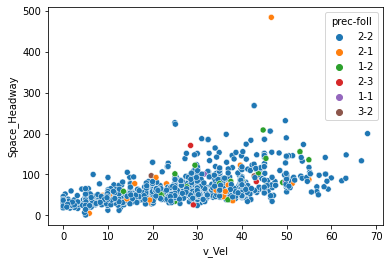

In [37]:
sns.scatterplot(data=ngsim4, x='v_Vel', y='Space_Headway', hue = 'prec-foll',)